In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O6','C6']
psi_dihedral=['C1','O6','C6','C5']

di_sugar=['GLC', 'BGC']
patterns1= ['GLC(*_*_)]-BGC(*_*_)', 'GLC(*_*_)-BGC(*_*_)','GLC(*_*_)]-[*]-BGC(*_*_)', 'GLC(*_*_)-[*]-BGC(*_*_)']
patterns2= ['DGlcpa1-6DGlcpb', 'DGlcpa1-6]DGlcpb', 'DGlcpa1-6[*]DGlcpb']
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-6D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A7C', '1ABR', '1ABR', '1AGM', '1AH1', '1AU1', '1AU1', '1AX0', '1AX1', '1AX2', '1AXY', '1AXZ', '1B0F', '1B0F', '1B37', '1B41', '1B5F', '1B5Q', '1BHG', '1BHG', '1BLF', '1BRR', '1BRR', '1BZB', '1C1Z', '1CDR', '1CF5', '1CF5', '1CKL', '1CKL', '1CKL', '1CKL', '1CPO', '1CVI', '1CVI', '1CVI', '1CVI', '1CVN', '1CVN', '1CVN', '1CVN', '1CVU', '1CVU', '1CXP', '1CXP', '1D2V', '1D2V', '1D5L', '1D5L', '1D7W', '1D7W', '1DEO', '1DEX', '1DGL', '1DGL', '1DIY', '1DL2', '1DN2', '1DN2', '1DNU', '1DNU', '1DNW', '1DNW', '1DOG', '1DP5', '1DPJ', '1DWA', '1DWF', '1DWG', '1DWH', '1DWI', '1DWJ', '1DZE', '1E04', '1E05', '1E4K', '1E4K', '1E6Q', '1E6S', '1EOM', '1ETH', '1ETH', '1EX1', '1F6A', '1F6A', '1F6A', '1F6A', '1F8B', '1F8C', '1F8D', '1F8E', '1F8R', '1F8R', '1F8R', '1FC1', '1FC1', '1FC2', '1FE2', '1FE8', '1FE8', '1FE8', '1FI1', '1FRT', '1FRT', '1FUJ', '1FUJ', '1FUJ', '1FUJ', '1FX5', '1FZD', '1FZD', '1FZD', '1FZD', '1G0V', '1G6I', '1G6I

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 1 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 1 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 29 
valid torsion1 and torsion2: (29, 29)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['2.F', '1.F'], ['4C1', '4C1'])
(['2.D', '1.D'], ['4C1', '4C1'])
(['2.E', '1.E'], ['4C1', '4C1'])
(['2.E', '1.E'], ['4C1', '4C1'])
(['2.C', '1.C'], ['4C1', '-'])
(['2.B', '1.B'], ['4C1', '-'])
(['2.D', '1.D'], ['4C1', '4C1'])
(['2.B', '1.B'], ['4C1', '4C1'])
(['2.A', '1.A'], ['4C1', '4C1'])
(['2.E', '1.E'], ['4C1', '4C1'])
(['2.C', '1.C'], ['4C1', '-'])
(['2.B', '1.B'], ['4C1', '4C1'])
(['2.D', '1.D'], ['4C1', '4C1'])
(['2.C', '1.C'], ['4C1', '4C1'])
(['2.C', '1.C'], ['4C1', '4C1'])
(['2.D', '1.D'], ['4C1', '4C1'])
(['2.C', '1.C'], ['4C1', '4C1'])
(['2.B', '1.B'], ['4C1', '4C1'])
(['801.A', '802.A'], ['4C1', '4C1'])
(['2.C', '1.C'], ['4C1', '-'])
(['2.B', '1.B'], ['4C1', '4C1'])
(['2.C', '1.C'], ['4C1', '4C1'])
(['2.C', '1.C'], ['4C1', '4C1'])
(['2.C', '1.C'], ['4C1', '4C1'])
(['2.D', '1.D'], ['4C1', '4C1'])
(['9.B', '8.B'], ['4C1', '4C1'])
(['2.B', '1.B'], ['4C1', '4C1'])
(['2.C', '1.C'], ['4C1', '4C1'])
(['2.D', '1.D'], ['4C1', '4C1'])


In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//8iuc.pdb F GLC 2 C1
../../pdbs//8iuc.pdb F BGC 1 O6
31842 31829
Connection found between(2) 31842 and 31829
../../pdbs//8iuc.pdb D GLC 2 C1
../../pdbs//8iuc.pdb D BGC 1 O6
31750 31737
Connection found between(2) 31750 and 31737
../../pdbs//8iuc.pdb E GLC 2 C1
../../pdbs//8iuc.pdb E BGC 1 O6
31796 31783
Connection found between(2) 31796 and 31783
../../pdbs//3wwg.pdb E GLC 2 C1
../../pdbs//3wwg.pdb E BGC 1 O6
16716 16715
Connection found between(2) 16716 and 16715
../../pdbs//5i0f.pdb C GLC 2 C1
../../pdbs//5i0f.pdb C BGC 1 O6
5827 5826
Connection found between 5827 and 5826
../../pdbs//3wnl.pdb B GLC 2 C1
../../pdbs//3wnl.pdb B BGC 1 O6
5531 5530
Connection found between 5531 and 5530
../../pdbs//5axh.pdb D GLC 2 C1
../../pdbs//5axh.pdb D BGC 1 O6
9648 9647
Connection found between 9648 and 9647
../../pdbs//3vmo.pdb B GLC 2 C1
../../pdbs//3vmo.pdb B BGC 1 O6
4999 4998
Connection found between 4999 and 4998
../../pdbs//1ogo.pdb A GLC 2 C1
../../pdbs//1ogo.pdb A BGC 1 O6
4412

In [13]:
output_df.to_csv('DGlcpa1-6DGlcpb_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv('DGlcpa1-6DGlcpb_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [14]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [15]:
instant1.torsions

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,8iuc.pdb,F GLC 2 C2 C1 BGC 1 O6 C6,F GLC 2 C1 BGC 1 O6 C6 C5,177.339,164.220,"([GLC(2_F_), BGC(1_F_)], [27.94, 42.36])",GLC(2_F_)-BGC(1_F_),DGlcpa1-6DGlcpb1-ROH,"([2.F, 1.F], [4C1, 4C1])"
1,8iuc.pdb,D GLC 2 C2 C1 BGC 1 O6 C6,D GLC 2 C1 BGC 1 O6 C6 C5,186.315,161.773,"([GLC(2_D_), BGC(1_D_)], [24.46, 35.24])",GLC(2_D_)-BGC(1_D_),DGlcpa1-6DGlcpb1-ROH,"([2.D, 1.D], [4C1, 4C1])"
2,8iuc.pdb,E GLC 2 C2 C1 BGC 1 O6 C6,E GLC 2 C1 BGC 1 O6 C6 C5,188.700,158.218,"([GLC(2_E_), BGC(1_E_)], [24.64, 34.39])",GLC(2_E_)-BGC(1_E_),DGlcpa1-6DGlcpb1-ROH,"([2.E, 1.E], [4C1, 4C1])"
3,3wwg.pdb,E GLC 2 C2 C1 BGC 1 O6 C6,E GLC 2 C1 BGC 1 O6 C6 C5,188.529,178.332,"([GLC(2_E_), BGC(1_E_)], [71.73, 63.95])",GLC(2_E_)-BGC(1_E_),DGlcpa1-6DGlcpb1-ROH,"([2.E, 1.E], [4C1, 4C1])"
4,5i0f.pdb,C GLC 2 C2 C1 BGC 1 O6 C6,C GLC 2 C1 BGC 1 O6 C6 C5,189.206,126.736,"([GLC(2_C_), BGC(1_C_)], [20.93, 18.45])",GLC(2_C_)-BGC(1_C_)-ASP(467_B_),DGlcpa1-6DGlcpb1-ASP,"([2.C, 1.C], [4C1, -])"
5,3wnl.pdb,B GLC 2 C2 C1 BGC 1 O6 C6,B GLC 2 C1 BGC 1 O6 C6 C5,181.963,179.964,"([GLC(2_B_), BGC(1_B_)], [47.7, 45.49])",GLC(4_B_)-GLC(3_B_)-GLC(2_B_)-BGC(1_B_),DGlcpa1-6DGlcpa1-6DGlcpa1-6DGlcpb1-ROH,"([2.B, 1.B], [4C1, -])"
6,5axh.pdb,D GLC 2 C2 C1 BGC 1 O6 C6,D GLC 2 C1 BGC 1 O6 C6 C5,202.939,190.963,"([GLC(2_D_), BGC(1_D_)], [49.49, 74.78])",GLC(6_D_)-GLC(5_D_)-GLC(4_D_)-GLC(3_D_)-GLC(2_...,DGlcpa1-6DGlcpa1-6DGlcpa1-6DGlcpa1-6DGlcpa1-6D...,"([2.D, 1.D], [4C1, 4C1])"
7,3vmo.pdb,B GLC 2 C2 C1 BGC 1 O6 C6,B GLC 2 C1 BGC 1 O6 C6 C5,159.917,200.055,"([GLC(2_B_), BGC(1_B_)], [46.1, 51.15])",GLC(4_B_)-GLC(3_B_)-GLC(2_B_)-BGC(1_B_),DGlcpa1-6DGlcpa1-6DGlcpa1-6DGlcpb1-ROH,"([2.B, 1.B], [4C1, 4C1])"
8,1ogo.pdb,A GLC 2 C2 C1 BGC 1 O6 C6,A GLC 2 C1 BGC 1 O6 C6 C5,189.687,167.793,"([GLC(2_A_), BGC(1_A_)], [24.06, 27.47])",GLC(2_A_)-BGC(1_A_),DGlcpa1-6DGlcpb1-ROH,"([2.A, 1.A], [4C1, 4C1])"
9,3wnn.pdb,E GLC 2 C2 C1 BGC 1 O6 C6,E GLC 2 C1 BGC 1 O6 C6 C5,181.185,185.253,"([GLC(2_E_), BGC(1_E_)], [35.85, 31.01])",GLC(8_E_)-GLC(7_E_)-GLC(6_E_)-GLC(5_E_)-GLC(4_...,DGlcpa1-6DGlcpa1-6DGlcpa1-6DGlcpa1-6DGlcpa1-6D...,"([2.E, 1.E], [4C1, 4C1])"


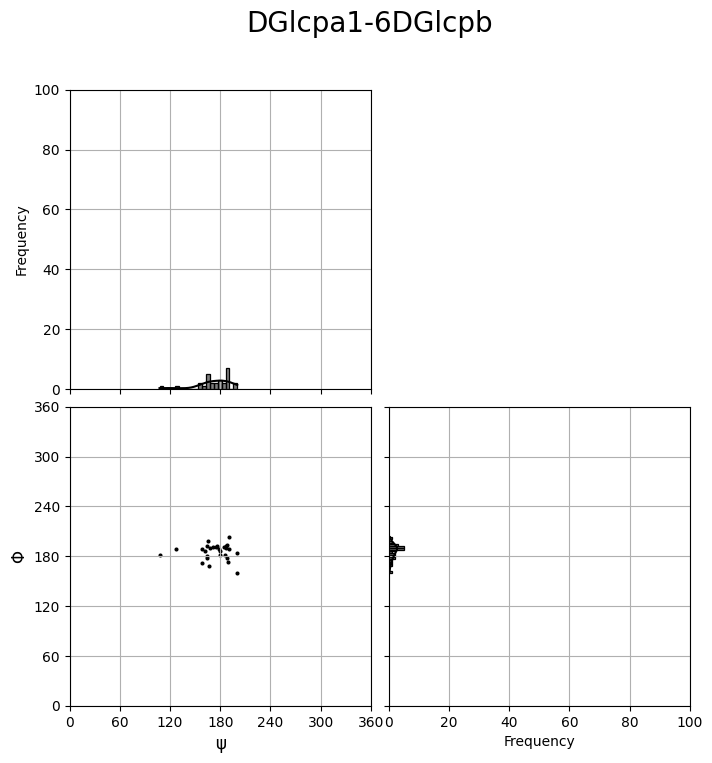

In [17]:
instant1.plot(output_df, title='DGlcpa1-6DGlcpb',max_histogram_scale=100,step_histogram_tick=20)